In [52]:
import pandas as pd
from W20P4.forecast import *
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# Forecasting

## Dataset

De opbrengsten van de voorbije 5 jaar.

In [53]:
pd.DataFrame(opbrengsten.reshape(-1, 4),
             columns=['Q{}'.format(i) for i in range(1, 5)],
             index=['Jaar {}'.format(i) for i in range(1, 6)])

,Q1,Q2,Q3,Q4
Jaar 1,20.0,100.0,175.0,13.0
Jaar 2,37.0,136.0,245.0,26.0
Jaar 3,75.0,155.0,326.0,48.0
Jaar 4,92.0,202.0,384.0,82.0
Jaar 5,176.0,282.0,445.0,181.0


## Voorspellingen o.b.v. verleden

### Eén voorspelling maken

In [54]:
naive(opbrengsten)
average(opbrengsten)
moving_average(opbrengsten, m=4)
linear_combination(opbrengsten)

181.0

160.0

271.0

287.94640003946205

### Forecast functies toegepast

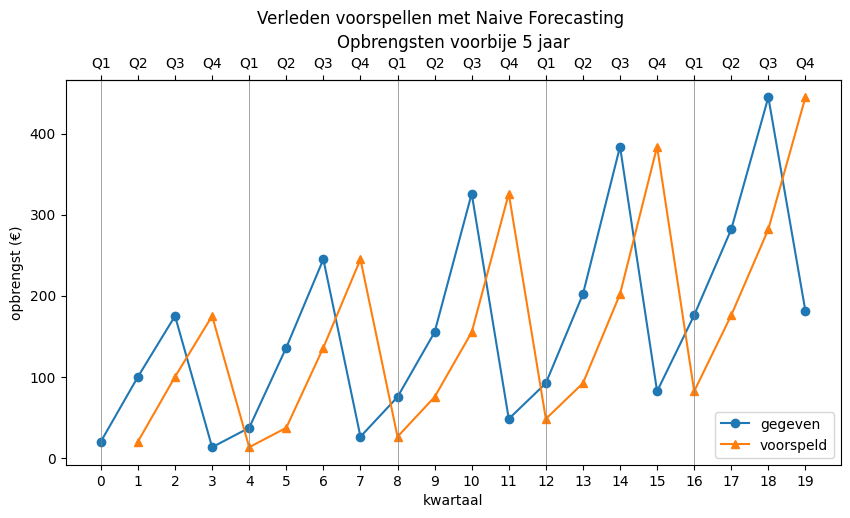

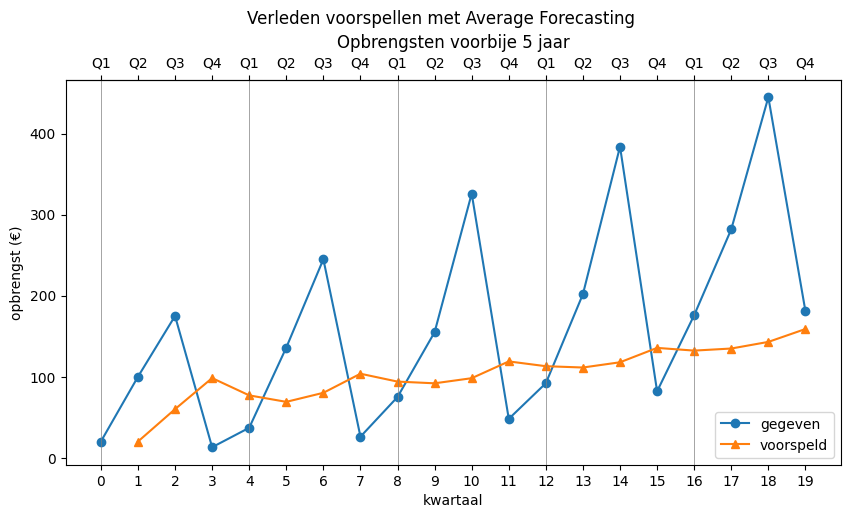

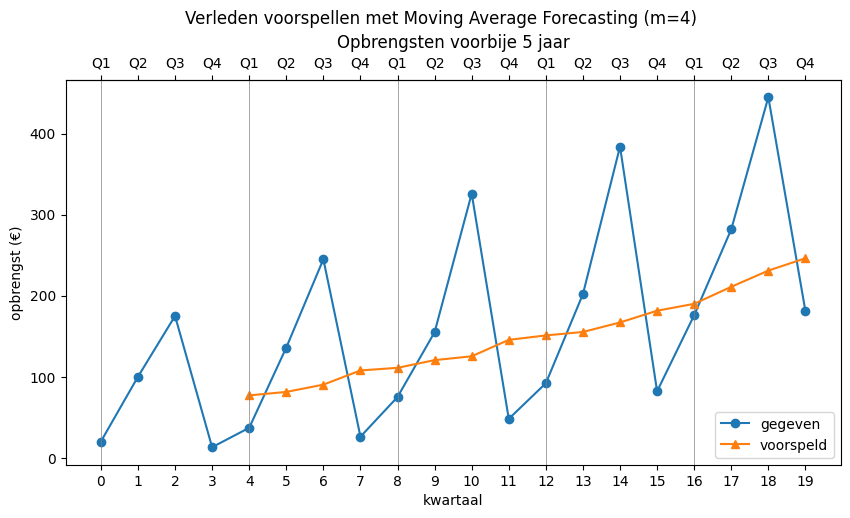

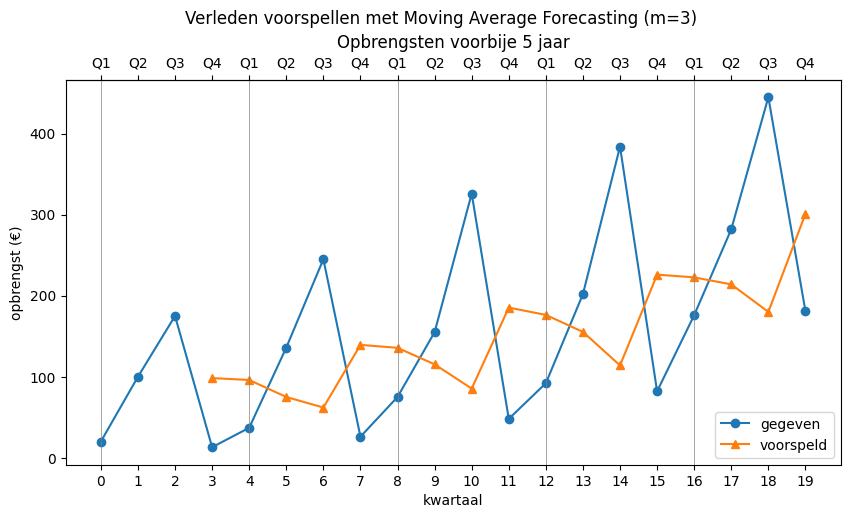

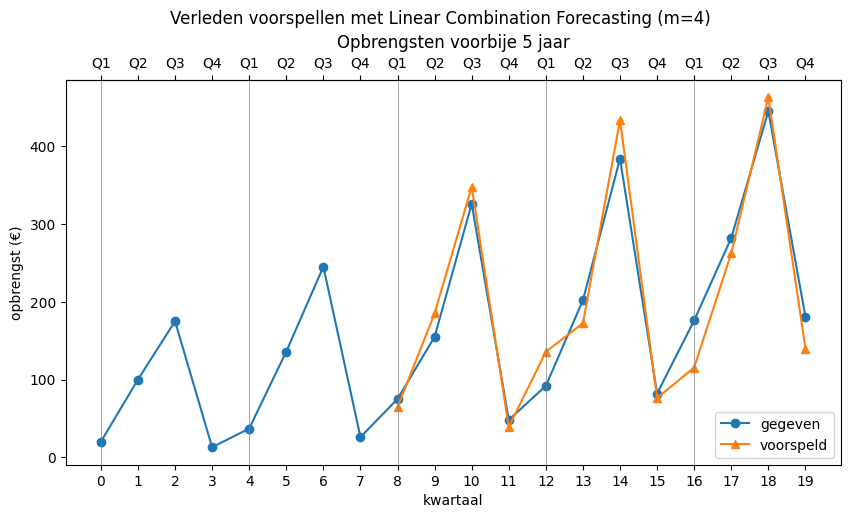

In [55]:
plot_trends(opbrengsten, predict(opbrengsten, 0, 20, naive), 'Verleden voorspellen met Naive Forecasting')
plot_trends(opbrengsten, predict(opbrengsten, 0, 20, average), 'Verleden voorspellen met Average Forecasting')
plot_trends(opbrengsten, predict(opbrengsten, 0, 20, moving_average),
            'Verleden voorspellen met Moving Average Forecasting (m=4)')
plot_trends(opbrengsten, predict(opbrengsten, 0, 20, moving_average, 3),
            'Verleden voorspellen met Moving Average Forecasting (m=3)')  # m = 4
plot_trends(opbrengsten, predict(opbrengsten, 0, 20, linear_combination),
            'Verleden voorspellen met Linear Combination Forecasting (m=4)')  # m = 4
# plot_trends(opbrengsten, predict(linear_combination, opbrengsten, 3)) # m = 3 (slechte voorspelling)

### Toekomst 4 stappen vooruit

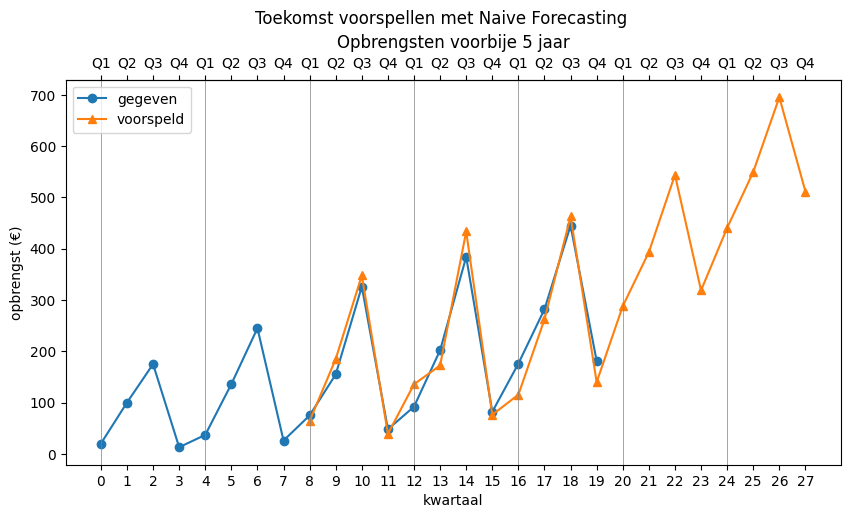

In [56]:
plot_trends(opbrengsten, predict(opbrengsten, 0, 28, linear_combination), 'Toekomst voorspellen met Naive Forecasting')

,20,21,22,23
naive,181.0,181.0,181.0,181.0


,20,21,22,23
average,160.0,160.0,160.0,160.0


,20,21,22,23
moving_average,271.0,294.75,297.9375,261.171875


,20,21,22,23
linear_combination,287.9464,393.214892,543.852617,318.771414


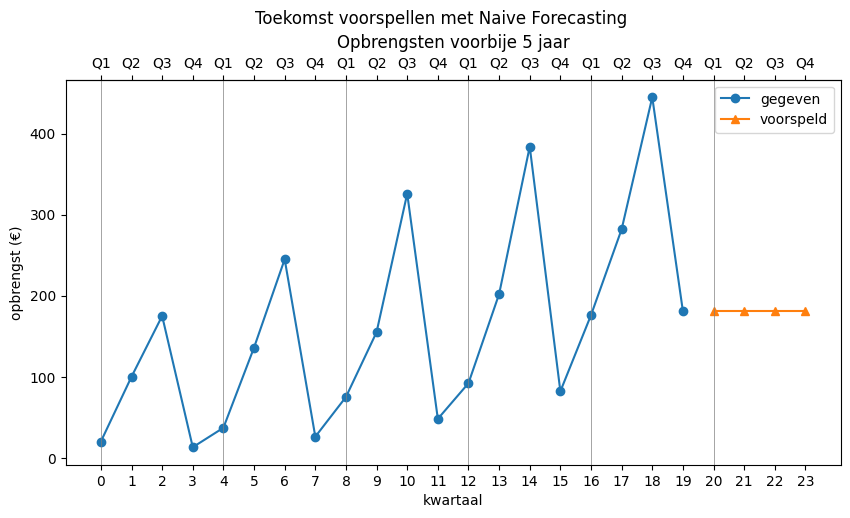

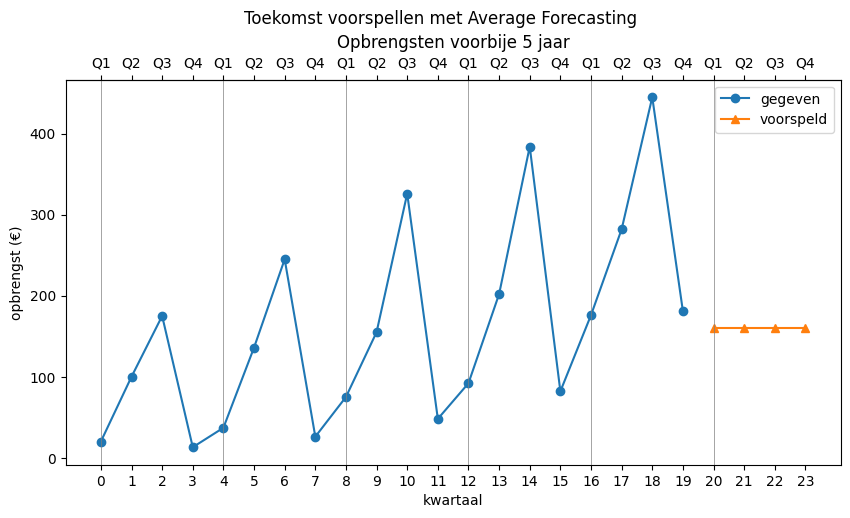

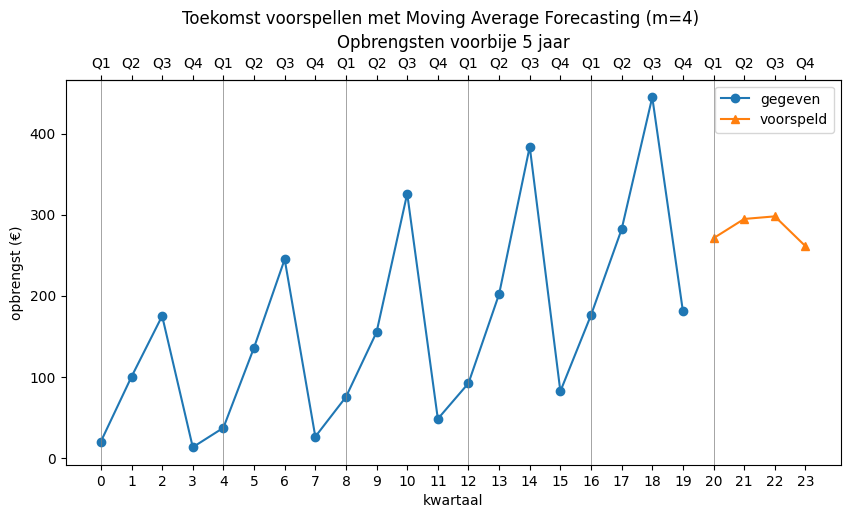

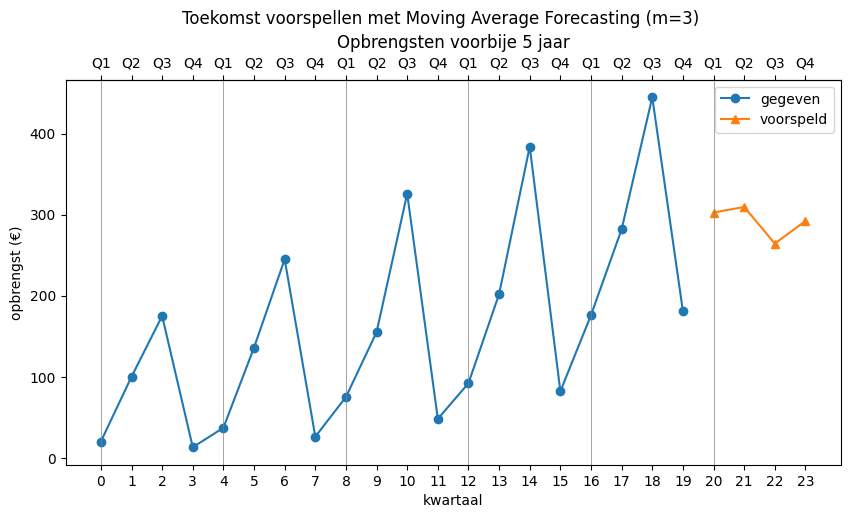

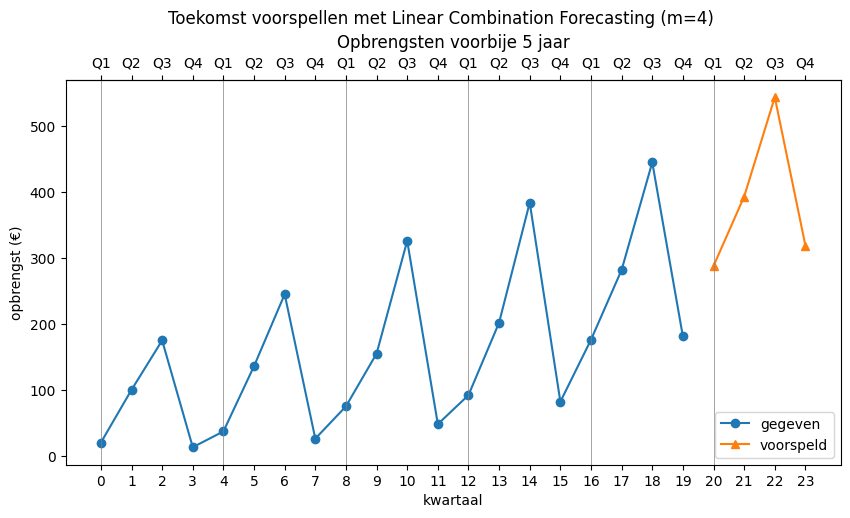

In [75]:
plot_trends(opbrengsten, predict(opbrengsten, 20, 24, naive),
            'Toekomst voorspellen met Naive Forecasting')
pd.DataFrame(predict(opbrengsten, 20, 24, naive)[20:], columns=['naive'], index=range(20, 24)).transpose()

plot_trends(opbrengsten, predict(opbrengsten, 20, 24, average),
            'Toekomst voorspellen met Average Forecasting')
pd.DataFrame(predict(opbrengsten, 20, 24, average)[20:], columns=['average'], index=range(20, 24)).transpose()

plot_trends(opbrengsten, predict(opbrengsten, 20, 24, moving_average),
            'Toekomst voorspellen met Moving Average Forecasting (m=4)')
pd.DataFrame(predict(opbrengsten, 20, 24, moving_average)[20:], columns=['moving_average'],
             index=range(20, 24)).transpose()

plot_trends(opbrengsten, predict(opbrengsten, 20, 24, moving_average, 3),
            'Toekomst voorspellen met Moving Average Forecasting (m=3)')  # m = 4

plot_trends(opbrengsten, predict(opbrengsten, 20, 24, linear_combination),
            'Toekomst voorspellen met Linear Combination Forecasting (m=4)')  # m = 4
pd.DataFrame(predict(opbrengsten, 20, 24, linear_combination)[20:], columns=['linear_combination'],
             index=range(20, 24)).transpose()

### Verleden en toekomst

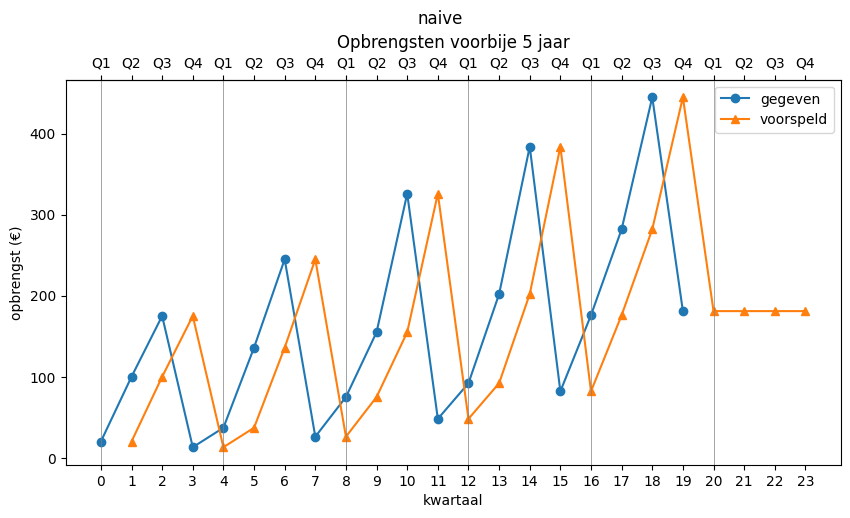

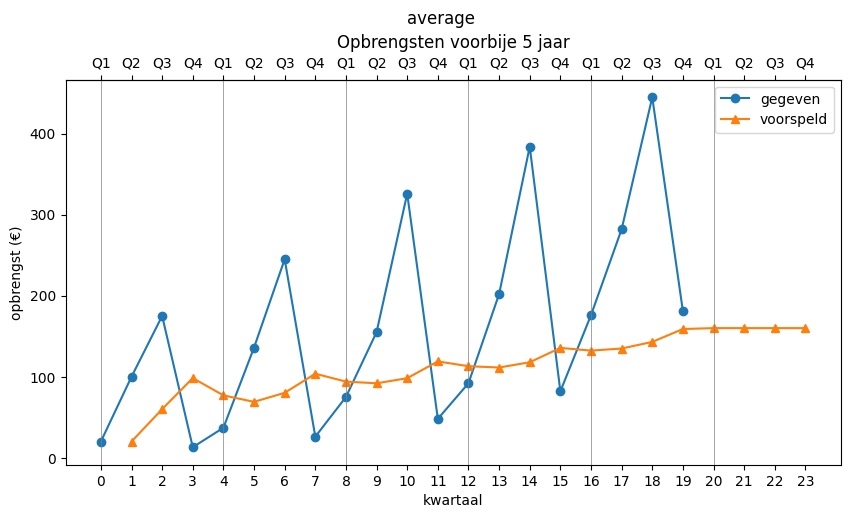

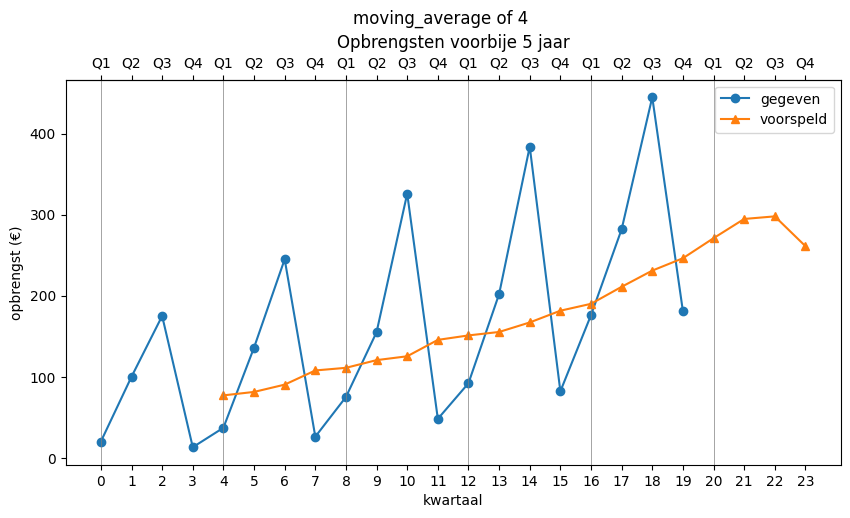

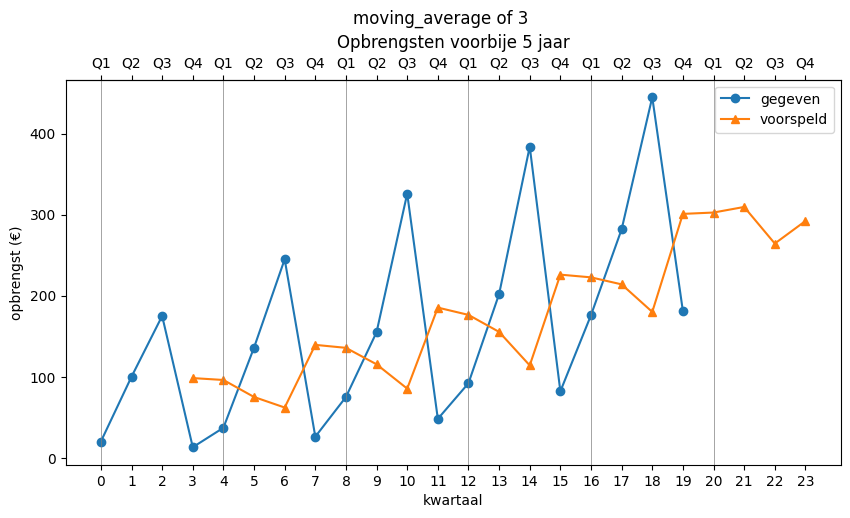

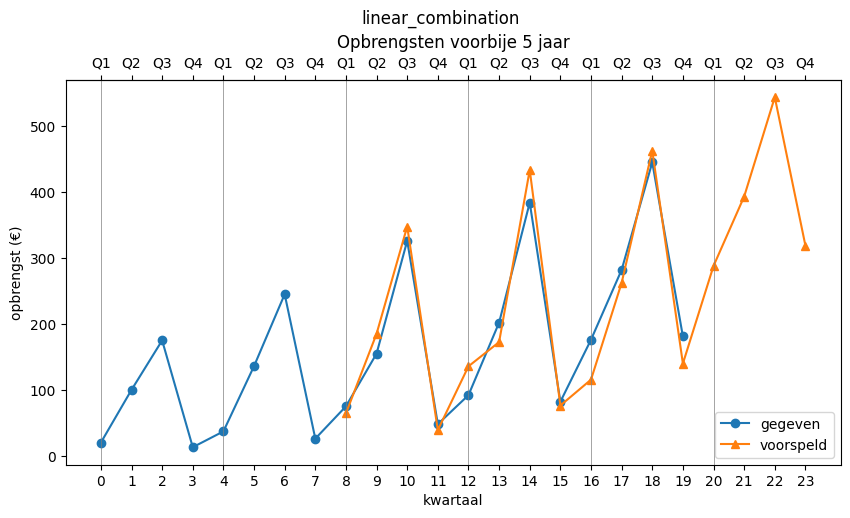

In [58]:
plot_trends(opbrengsten, predict(opbrengsten, 0, 24, naive), 'naive')
plot_trends(opbrengsten, predict(opbrengsten, 0, 24, average), 'average')
plot_trends(opbrengsten, predict(opbrengsten, 0, 24, moving_average), 'moving_average of 4')
plot_trends(opbrengsten, predict(opbrengsten, 0, 24, moving_average, 3), 'moving_average of 3')  # m = 4
plot_trends(opbrengsten, predict(opbrengsten, 0, 24, linear_combination), 'linear_combination')  # m = 4

In [59]:
forecast_errors(opbrengsten, predict(opbrengsten, 0, 20, naive), 'naive')

,MAE,RMSE,MAPE
naive,137.421053,158.697826,2.070257


In [60]:
x = opbrengsten
f1 = predict(opbrengsten, 0, 20, naive)
f2 = predict(opbrengsten, 0, 20, average)
f3 = predict(opbrengsten, 0, 20, moving_average)
f4 = predict(opbrengsten, 0, 20, linear_combination)

pd.concat([forecast_errors(x, f1, 'naive'),
           forecast_errors(x, f2, 'average'),
           forecast_errors(x, f3, 'moving average'),
           forecast_errors(x, f4, 'linear combination')
           ])

,MAE,RMSE,MAPE
naive,137.421053,158.697826,2.070257
average,103.004796,130.806207,1.036220
moving average,92.906250,113.321342,0.777070
linear combination,28.269228,32.792905,0.174283


### Berekening gewichten lineaire combinatie

In [61]:
a = bereken_gewichten(y=opbrengsten, m=4)

pd.DataFrame(a.reshape(1, -1),
             index=['coëfficiënten'],
             columns=[f'a{i}' for i in range(4)])

pd.DataFrame(np.repeat(1 / 4, 4).reshape(1, -1),
             index=['coëfficiënten'],
             columns=[f'a{i}' for i in range(4)])

,a0,a1,a2,a3
coëfficiënten,1.008019,0.137429,0.126002,0.086792


,a0,a1,a2,a3
coëfficiënten,0.25,0.25,0.25,0.25


## Voorspellingen o.b.v. een model

### Trend model

In [73]:
predict_trend = create_trend_model(opbrengsten)
predict_trend(np.arange(24))

array([ 49.32857143,  60.97819549,  72.62781955,  84.27744361,
        95.92706767, 107.57669173, 119.22631579, 130.87593985,
       142.52556391, 154.17518797, 165.82481203, 177.47443609,
       189.12406015, 200.77368421, 212.42330827, 224.07293233,
       235.72255639, 247.37218045, 259.02180451, 270.67142857,
       282.32105263, 293.97067669, 305.62030075, 317.26992481])

<function create_trend_model.<locals>.<lambda> at 0x000001F0BC03C700>


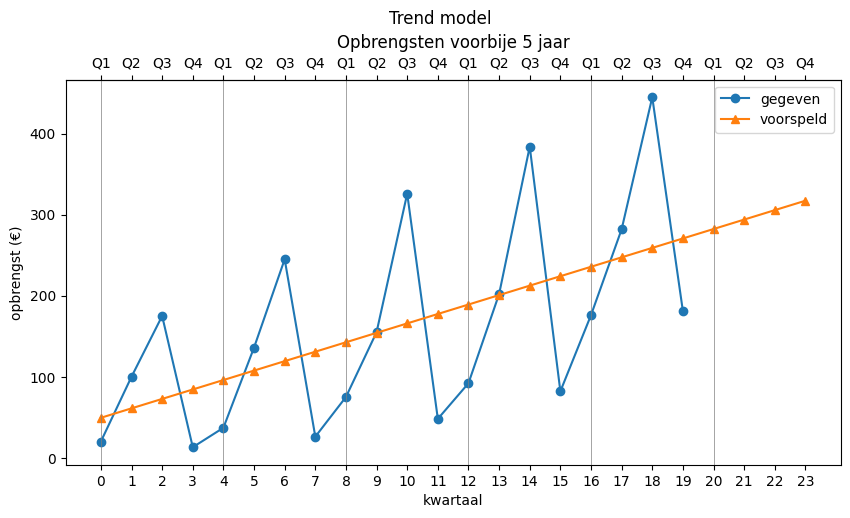

In [63]:
plot_trends(opbrengsten, predict_trend(np.arange(24)), 'Trend model')

In [64]:
forecast_errors(opbrengsten, predict_trend(np.arange(20)), 'Trend model')

,MAE,RMSE,MAPE
Trend model,85.0,100.616689,1.149211


### Seasonal Decomposition Model


### Periode van het patroon vinden met autocorrelatie

,lags,acf
10,0,1.000000
6,-4,0.731597
14,4,0.731597
11,1,0.682080
9,-1,0.682080
2,-8,0.512511
18,8,0.512511
7,-3,0.510028
13,3,0.510028
5,-5,0.487317


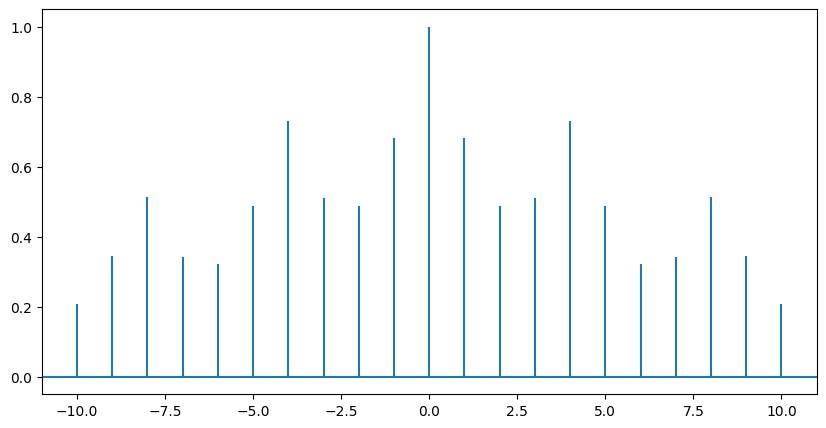

In [65]:
fig, ax = plt.subplots(figsize=(10, 5))
lags, acfs, _, _ = ax.acorr(opbrengsten)
pd.DataFrame({'lags': lags, 'acf': acfs}).sort_values(by='acf', ascending=False)

In [66]:
# de functie find_period vindt de periode van het patroon in de data
find_period(opbrengsten, maxlags=10, top_n=3)

array([4, 1, 8], dtype=int64)

### Seasonal Decomposition

Installeer statsmodels met `pip install statsmodels`


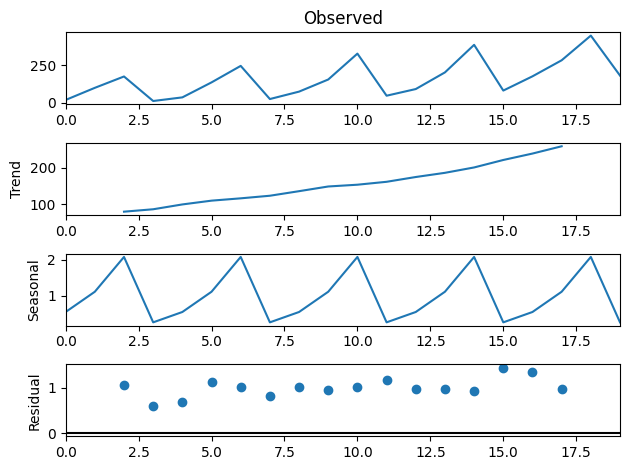

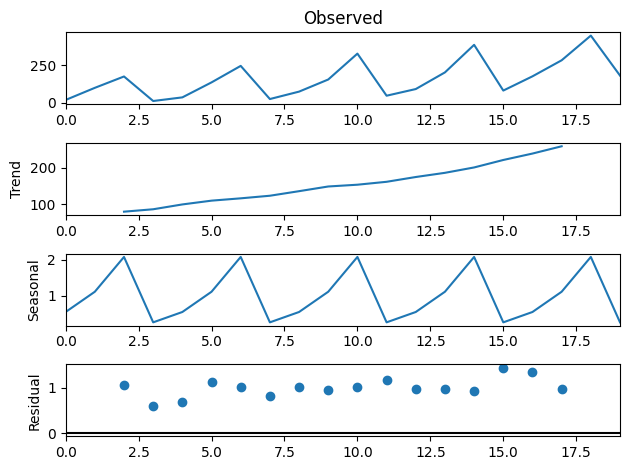

In [67]:
from IPython import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

from statsmodels.tsa.seasonal import seasonal_decompose

sd_model = seasonal_decompose(opbrengsten, model='multiplicative', period=4)

sd_model.plot()

# de verschillende componenten van het model zitten in trend, seasonal en resid
# sd_model.trend
# sd_model.seasonal.reshape(-1, 4)
# sd_model.resid

### Trend model

In [68]:
X = np.arange(2, 18)
y = sd_model.trend[2:18]

model = GeneralRegression(exp=True)
model.fit(X, y)

print('R² =', model.r2_score)
print('a =', model.intercept_)
print('b =', model.coef_)

R² = 0.9952638485024424
a = 4.276010969603498
b = [0.         0.07495604]


### Voorspelling met Seasonal Decomposition Model

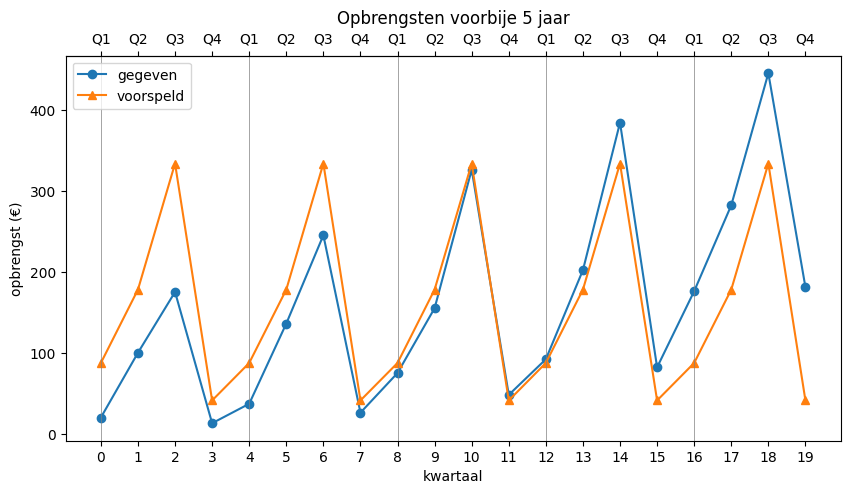

In [69]:
plot_trends(opbrengsten, opbrengsten.mean() * sd_model.seasonal)